In [1]:
import numpy as np
from IPython.core.display import display
import matplotlib.pyplot as plt
from we_recommend_a_grade_10.data import *

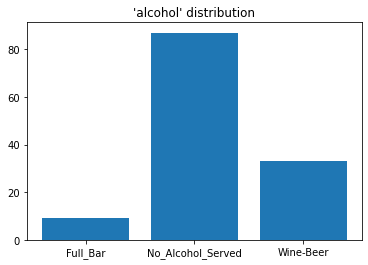

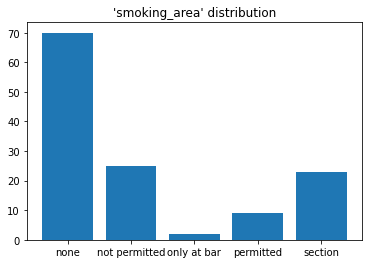

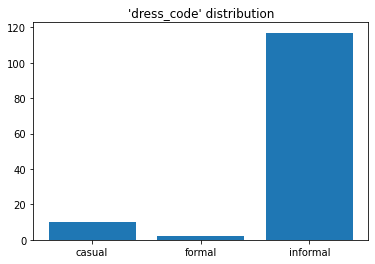

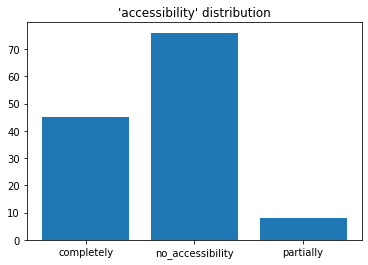

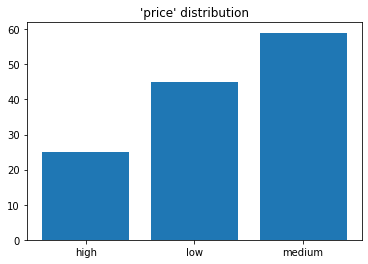

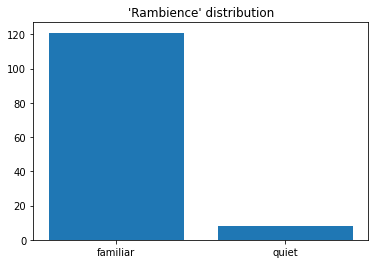

In [2]:
res_Profile.columns
vector_cols = ['alcohol', 'smoking_area', 'dress_code', 'accessibility', 'price', 'Rambience']
cp = res_Profile[vector_cols].copy()
for col in vector_cols:
    cpi = cp[col].sort_values().copy()
    cpi.index = range(len(cpi))
    cp[col] = cpi

cp_nd = cp.drop_duplicates().copy()
rng = list(cp_nd.index) + [len(cp)-1]
cp_nd['count'] = [rng[i+1] - rng[i] for i in range(len(cp_nd))]
cp_nd
for col in vector_cols:
    data = cp_nd.groupby(col)['count'].sum()
    plt.bar(data.index, data)
    plt.title("'%s' distribution"%col)
    plt.savefig('../graphs/%s_distribution.png'%col)
    plt.show()

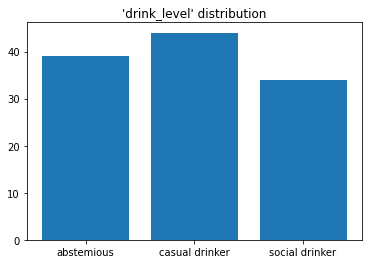

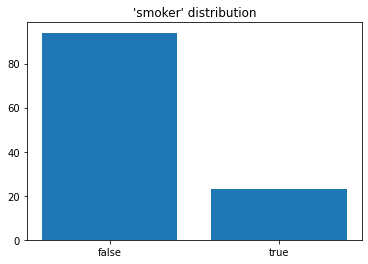

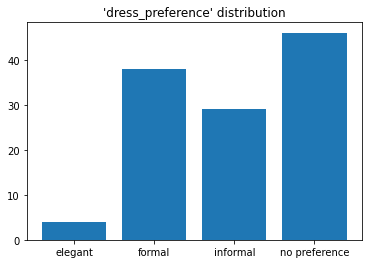

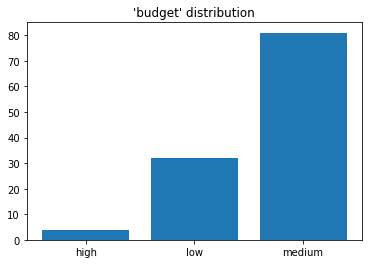

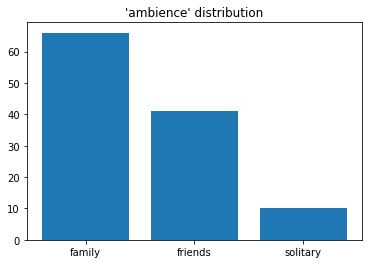

In [3]:
user_Profile_dropped = user_Profile.replace('?', np.NAN).dropna()
user_Profile_dropped.columns
vector_cols_user = ['drink_level', 'smoker', 'dress_preference', 'budget', 'ambience']
#'drink_level', 'smoker', 'dress_preference', None, 'budget', 'ambience'
cp_user = user_Profile_dropped[vector_cols_user].copy()
for col in vector_cols_user:
    cp_user_i = cp_user[col].sort_values().copy()
    cp_user_i.index = range(len(cp_user_i))
    cp_user[col] = cp_user_i

cp_nd_user = cp_user.drop_duplicates().copy()
rng_user = list(cp_nd_user.index) + [len(cp_user)-1]
cp_nd_user['count'] = [rng_user[i+1] - rng_user[i] for i in range(len(cp_nd_user))]
cp_nd_user
for col in vector_cols_user:
    data = cp_nd_user.groupby(col)['count'].sum()
    plt.bar(data.index, data)
    plt.title("'%s' distribution"%col)
    plt.savefig('../graphs/%s_distribution_user.png'%col)
    plt.show()

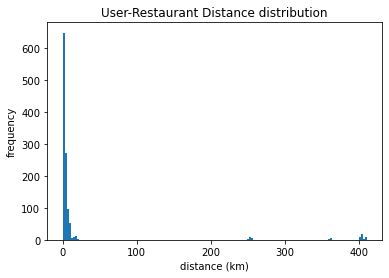

In [4]:
plt.hist(distance_matrix['distance'], 150)
plt.title('User-Restaurant Distance distribution')
plt.xlabel('distance (km)')
plt.ylabel('frequency')
plt.savefig('../graphs/distance_hist.png')

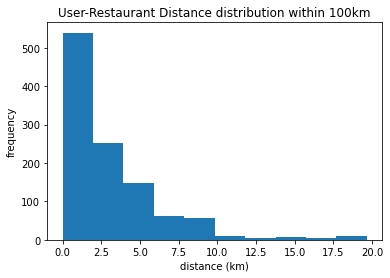

In [5]:
plt.hist(distance_matrix[distance_matrix.distance < 100].distance);
plt.title('User-Restaurant Distance distribution within 100km')
plt.xlabel('distance (km)')
plt.ylabel('frequency')
plt.savefig('../graphs/distance_hist_short.png')

In [8]:
from we_recommend_a_grade_10.vectorization import *
from we_recommend_a_grade_10.methods import train_and_run_VB, get_train_test_split
ratings_vertices
tr, ts = get_train_test_split()
preds, knn = train_and_run_VB(tr, ts)

In [9]:
preds

,user,item,rating,prediction
690,U1001,135039,3.0,3.6
692,U1001,135033,3.0,4.6
694,U1001,135051,4.0,3.6
1063,U1002,135106,3.0,4.8
1064,U1002,132825,4.0,2.6
...,...,...,...,...
879,U1137,132951,6.0,4.8
882,U1137,135085,5.0,5.2
886,U1137,135058,4.0,4.2
891,U1137,132755,6.0,3.2
